Final Project Submission
Please fill out:

Student name: EVANS MWAURA MACHUA
Student pace: self paced / part time / full time : PART TIME
Scheduled project review date/time: 24/07/2023
Instructor name:   M. MWIKALI
Blog post URL: 

In [1]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
TMDBAPIKEY = '2cc69c34cf1e8930d62596b11e4d0f15'

# First, let's fetch the genres
url_genres = 'https://api.themoviedb.org/3/genre/movie/list?api_key=' + TMDBAPIKEY
r = requests.get(url_genres)
genres = r.json()['genres']
genre_dict = {genre['id']: genre['name'] for genre in genres}

movies = []

In [3]:
# Fetch highest grossing films of the last 5 years
for i in range(1, 6):  # TMDB returns 20 results per page, so we iterate through the first 5 pages to get top 100 movies
    url = f'https://api.themoviedb.org/3/discover/movie?api_key={TMDBAPIKEY}&sort_by=revenue.desc&primary_release_date.gte=2018-01-01&page={i}'
    r = requests.get(url)
    movies.extend(r.json()['results'])

In [4]:
# Process the data
for movie in movies:
    # replace genre ids with genre names
    movie['genre_ids'] = [genre_dict[genre] for genre in movie['genre_ids'] if genre in genre_dict]


In [5]:
# Convert the data to a pandas DataFrame
df = pd.json_normalize(movies)
df.to_csv('file1.csv')
print(df.head(10))

   adult                     backdrop_path  \
0  False  /7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg   
1  False  /8rpDcsfLJypbO6vREc0547VKqEv.jpg   
2  False  /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg   
3  False  /14QbnygCuTO0vl7CAFmPf1fgZfV.jpg   
4  False  /1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg   
5  False  /AaV1YIdWKnjAIAOe8UUKBFm327v.jpg   
6  False  /xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg   
7  False  /b6ZJZHUdMEFECvGiDpJjlfUWela.jpg   
8  False  /9n2tJBplPbgR2ca05hS5CKXwP2c.jpg   
9  False  /3s9O5af2xWKWR5JzP2iJZpZeQQg.jpg   

                                         genre_ids      id original_language  \
0             [Adventure, Science Fiction, Action]  299534                en   
1             [Science Fiction, Adventure, Action]   76600                en   
2             [Adventure, Action, Science Fiction]  299536                en   
3             [Action, Adventure, Science Fiction]  634649                en   
4            [Adventure, Drama, Family, Animation]  420818                en   
5            

In [6]:
# Expand genre_ids into its own DataFrame columns
popDf = df['genre_ids'].apply(pd.Series)

# Merge the dataframes
popDf = pd.concat([df.drop(['genre_ids'], axis=1), popDf], axis=1)
print(popDf.head())

   adult                     backdrop_path      id original_language  \
0  False  /7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg  299534                en   
1  False  /8rpDcsfLJypbO6vREc0547VKqEv.jpg   76600                en   
2  False  /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg  299536                en   
3  False  /14QbnygCuTO0vl7CAFmPf1fgZfV.jpg  634649                en   
4  False  /1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg  420818                en   

             original_title  \
0         Avengers: Endgame   
1  Avatar: The Way of Water   
2    Avengers: Infinity War   
3   Spider-Man: No Way Home   
4             The Lion King   

                                            overview  popularity  \
0  After the devastating events of Avengers: Infi...     136.907   
1  Set more than a decade after the events of the...     858.857   
2  As the Avengers and their allies have continue...     228.927   
3  Peter Parker is unmasked and no longer able to...     389.870   
4  Simba idolizes his father, King Mufas

In [7]:
# Drop rows with no genres
popDf = popDf.dropna(subset=[0])

df_grouped = popDf.groupby(0)['popularity'].mean().reset_index()

# Sort by popularity and take top 10 genres
df_grouped = df_grouped.sort_values('popularity', ascending=False).head(10)
print(df_grouped)

                  0  popularity
0            Action  551.525658
12  Science Fiction  544.587909
2         Animation  490.158889
1         Adventure  209.026000
4             Crime  173.469500
8           Fantasy  164.200000
9            Horror  120.963000
7            Family   91.266600
14              War   61.831333
13         Thriller   54.863000


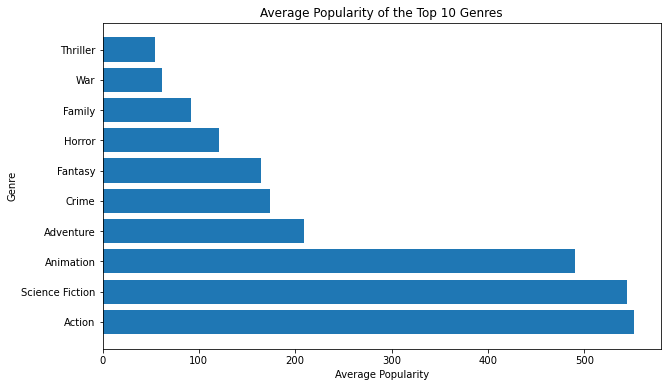

In [8]:
# Plot the average popularity of the top 10 genres
plt.figure(figsize=(10,6))
plt.barh(df_grouped[0], df_grouped['popularity'])
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.title('Average Popularity of the Top 10 Genres')
plt.show()

Fromthe bar graph above , it is clear that Action films are the most popular followed by the science fiction and animations respectively. This is a good indicator of a line in which the organization should consider to venture in.
    

In [9]:
#Popularity of Genres Over Time
# Extract year from release_date
df['year'] = pd.DatetimeIndex(df['release_date']).year

# Expand genre_ids into its own DataFrame columns
genres_df = df['genre_ids'].apply(pd.Series)


In [10]:
# Merge the dataframes
df = pd.concat([df.drop(['genre_ids'], axis=1), genres_df], axis=1)

# Drop rows with no genres
df = df.dropna(subset=[0])
print(df.head(10))

   adult                     backdrop_path      id original_language  \
0  False  /7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg  299534                en   
1  False  /8rpDcsfLJypbO6vREc0547VKqEv.jpg   76600                en   
2  False  /mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg  299536                en   
3  False  /14QbnygCuTO0vl7CAFmPf1fgZfV.jpg  634649                en   
4  False  /1TUg5pO1VZ4B0Q1amk3OlXvlpXV.jpg  420818                en   
5  False  /AaV1YIdWKnjAIAOe8UUKBFm327v.jpg  361743                en   
6  False  /xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg  330457                en   
7  False  /b6ZJZHUdMEFECvGiDpJjlfUWela.jpg  284054                en   
8  False  /9n2tJBplPbgR2ca05hS5CKXwP2c.jpg  502356                en   
9  False  /3s9O5af2xWKWR5JzP2iJZpZeQQg.jpg  351286                en   

                   original_title  \
0               Avengers: Endgame   
1        Avatar: The Way of Water   
2          Avengers: Infinity War   
3         Spider-Man: No Way Home   
4                   Th

From the analysis above, it is worth noting that from most of the movies appearing top in terms of revenue and popularity, each movie is associated with one or more genres. These genres represent what type of a movie it is. Some of the examples of genres include science fiction, actions, comedy, animation, adventures and dramas.

In [11]:
# Group by year and genre, then calculate average popularity
dfYear = df.groupby(['year', 0])['popularity'].mean().reset_index()
print(dfYear.head)

<bound method NDFrame.head of     year                0   popularity
0   2018           Action   116.925500
1   2018        Adventure   123.457000
2   2018        Animation    56.091500
3   2018           Comedy    18.051000
4   2018      Documentary     0.879000
5   2018            Drama   125.727000
6   2018           Family    60.887000
7   2018          Fantasy    39.436000
8   2018           Horror   130.544000
9   2018            Music    37.514667
10  2018          Mystery     0.600000
11  2018  Science Fiction    68.581667
12  2019           Action    81.063000
13  2019        Adventure    90.025000
14  2019        Animation    51.848500
15  2019           Comedy    58.201000
16  2019            Crime    87.259000
17  2019            Drama     7.763000
18  2019           Family    98.861500
19  2019           Horror   111.382000
20  2019  Science Fiction    72.429000
21  2019              War    96.113000
22  2020           Action   126.675000
23  2020            Music     2.10

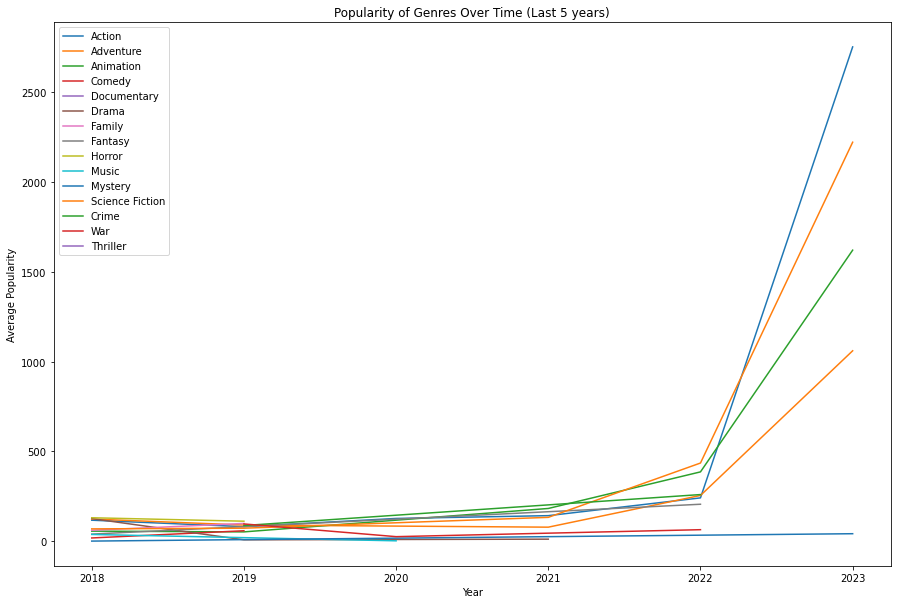

In [12]:
# Plot the popularity over time for each genre
fig, ax = plt.subplots(figsize=(15,10))
for genre in dfYear[0].unique():
    genre_df = dfYear[dfYear[0] == genre]
    ax.plot(genre_df['year'], genre_df['popularity'], label=genre)
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.title('Popularity of Genres Over Time (Last 5 years)')
plt.legend()
plt.show()

From the line graph here above, it is important to note the trend in popularity of the various genres of films over the past few years.(5)
Notably, action movies' popularity rose tremendously since year 2022. There was also a similar in trend in popularity for films in adventure genre, animations amd comedy. 

My Recommendations:
    
    Based on the findings derived here above, myadvise to the new studio would be:
        
        1. To consider genres of films that have shown great popularity in the past and up to date.As seen above, genres such as action and science fiction have shown great popularity over time thus are a good consideration.
        2. From the report obtained above, movies that showd greatest popularity had a mix of more than one genre in them .This shows that there should be consideration of having films with more than one genre in production which will increase the market base and great innovations in the combinations.
        3. It is also advisable to keep updated on the current trend in popularity in th film industry.This will inform on hwta kid of genre to invest in ata particular time. For example, it is clear in theline graph above how Adventure films became popular as from 2022.

Fromthe above analysis, it would be advisable for microsoft to venture in either the Action, Science fiction or a combination of touch of the two genres.This would be an advisable investment to venture.